In [1]:
import csv
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm
import statsmodels.tsa.arima_model 
from datetime import datetime, timedelta
from statsmodels.graphics.api import qqplot

In [2]:
df_data = pd.read_csv('data/preprocessed_input.csv')

In [3]:
df_data

,datetime,dayofweek,hour,dt0_10_total_vol,dt20_10_total_vol,dt40_10_total_vol,dt60_10_total_vol,dt80_10_total_vol,dt100_10_total_vol,dt120_10_total_vol,...,dt0_rel_humidity,dt0_precipitation,dt180_pressure,dt180_sea_pressure,dt180_wind_direction,dt180_wind_speed,dt180_temperature,dt180_rel_humidity,dt180_precipitation,is_holiday
0,2016-09-20 00:00:00,1,0,14,13,7,6,5,5,6,...,68.0,0.0,1013.5,1018.5,354.0,2.6,23.9,58.0,0.0,0
1,2016-09-20 03:00:00,1,3,10,8,5,11,8,15,9,...,58.0,0.0,1012.2,1017.2,7.0,4.6,26.9,43.0,0.0,0
2,2016-09-20 06:00:00,1,6,13,20,29,38,30,31,53,...,43.0,0.0,1012.6,1017.6,11.0,4.5,25.4,42.0,0.0,0
3,2016-09-20 09:00:00,1,9,51,68,59,56,60,63,57,...,42.0,0.0,1013.7,1018.7,25.0,1.7,22.1,53.0,0.0,0
4,2016-09-20 12:00:00,1,12,53,62,75,98,82,84,81,...,53.0,0.0,1014.0,1019.0,326.0,2.2,20.5,65.0,0.0,0
5,2016-09-20 15:00:00,1,15,71,64,73,48,57,48,38,...,65.0,0.0,1013.8,1018.8,327.0,1.4,19.4,74.0,0.0,0
6,2016-09-20 18:00:00,1,18,26,29,20,17,29,21,12,...,74.0,0.0,1014.1,1019.1,330.0,1.0,18.6,80.0,0.0,0
7,2016-09-20 21:00:00,1,21,17,29,37,30,17,19,20,...,80.0,0.0,1015.5,1020.5,219.0,0.7,21.7,69.0,0.0,0
8,2016-09-21 00:00:00,2,0,12,6,7,7,4,6,6,...,69.0,0.0,1015.4,1020.4,17.0,2.4,25.2,59.0,0.0,0
9,2016-09-21 03:00:00,2,3,5,6,10,16,14,11,10,...,59.0,0.0,1013.1,1018.1,328.0,3.0,26.2,56.0,0.0,0


## mean interpolation

In [76]:
df_travel_time_mean = df_data.filter(regex='A2_routetime_median').mean()
df_travel_time_mean

dt0_A2_routetime_median      58.987716
dt20_A2_routetime_median     56.697500
dt40_A2_routetime_median     58.456729
dt60_A2_routetime_median     60.798814
dt80_A2_routetime_median     58.740282
dt100_A2_routetime_median    59.540616
dt120_A2_routetime_median    59.407668
dt140_A2_routetime_median    57.839552
dt160_A2_routetime_median    58.229879
dt180_A2_routetime_median    58.954928
dt200_A2_routetime_median    56.697500
dt220_A2_routetime_median    58.476103
dtype: float64

In [6]:
df_travel_time = df_data.filter(regex='A2_routetime_median').fillna(df_travel_time_mean)
df_travel_time

,dt0_A2_routetime_median,dt20_A2_routetime_median,dt40_A2_routetime_median,dt60_A2_routetime_median,dt80_A2_routetime_median,dt100_A2_routetime_median,dt120_A2_routetime_median,dt140_A2_routetime_median,dt160_A2_routetime_median,dt180_A2_routetime_median,dt200_A2_routetime_median,dt220_A2_routetime_median
0,65.775000,56.6975,54.330000,60.798814,50.910000,58.850000,59.407668,75.640000,58.229879,44.105000,46.0100,75.460000
1,44.105000,46.0100,75.460000,43.580000,60.940000,47.320000,59.407668,49.960000,47.775000,58.954928,93.1900,41.090000
2,58.987716,93.1900,41.090000,71.140000,55.660000,56.325000,59.720000,49.520000,82.310000,67.690000,60.0600,82.450000
3,67.690000,60.0600,82.450000,71.680000,54.290000,79.190000,60.640000,78.335000,66.980000,65.480000,77.8550,65.260000
4,65.480000,77.8550,65.260000,68.890000,74.820000,52.730000,59.070000,52.255000,84.525000,52.320000,60.8500,50.560000
5,52.320000,60.8500,50.560000,72.330000,87.900000,61.875000,60.320000,55.275000,58.810000,66.220000,64.1300,60.010000
6,66.220000,64.1300,60.010000,51.820000,42.050000,74.705000,54.280000,57.850000,54.695000,92.970000,59.8950,44.530000
7,92.970000,59.8950,44.530000,39.325000,44.590000,43.720000,65.950000,52.740000,45.910000,57.155000,38.5450,32.300000
8,57.155000,38.5450,32.300000,102.170000,58.740282,43.520000,46.130000,53.155000,40.005000,52.120000,40.4800,38.000000
9,52.120000,40.4800,38.000000,67.500000,26.080000,50.970000,40.350000,44.370000,47.400000,58.995000,56.2600,48.440000


## Create Time Axis

In [16]:
time_len = len(df_travel_time)*len(df_travel_time.iloc[0,0:9])
travel_time_index = [pd.to_datetime(df_data.iloc[0,0])]*time_len + \
np.arange(time_len)*timedelta(minutes=20)
travel_time_index

array([Timestamp('2016-09-20 00:00:00'), Timestamp('2016-09-20 00:20:00'),
       Timestamp('2016-09-20 00:40:00'), ...,
       Timestamp('2016-10-18 02:00:00'), Timestamp('2016-10-18 02:20:00'),
       Timestamp('2016-10-18 02:40:00')], dtype=object)

## Create Indexed Route Travel Time Axis

In [18]:
travel_time = pd.Series(pd.DataFrame.as_matrix(df_travel_time.iloc[:,0:9]).reshape(-1))
travel_time.index = pd.Index(travel_time_index)
travel_time    

2016-09-20 00:00:00    65.775000
2016-09-20 00:20:00    56.697500
2016-09-20 00:40:00    54.330000
2016-09-20 01:00:00    60.798814
2016-09-20 01:20:00    50.910000
2016-09-20 01:40:00    58.850000
2016-09-20 02:00:00    59.407668
2016-09-20 02:20:00    75.640000
2016-09-20 02:40:00    58.229879
2016-09-20 03:00:00    44.105000
2016-09-20 03:20:00    46.010000
2016-09-20 03:40:00    75.460000
2016-09-20 04:00:00    43.580000
2016-09-20 04:20:00    60.940000
2016-09-20 04:40:00    47.320000
2016-09-20 05:00:00    59.407668
2016-09-20 05:20:00    49.960000
2016-09-20 05:40:00    47.775000
2016-09-20 06:00:00    58.987716
2016-09-20 06:20:00    93.190000
2016-09-20 06:40:00    41.090000
2016-09-20 07:00:00    71.140000
2016-09-20 07:20:00    55.660000
2016-09-20 07:40:00    56.325000
2016-09-20 08:00:00    59.720000
2016-09-20 08:20:00    49.520000
2016-09-20 08:40:00    82.310000
2016-09-20 09:00:00    67.690000
2016-09-20 09:20:00    60.060000
2016-09-20 09:40:00    82.450000
          

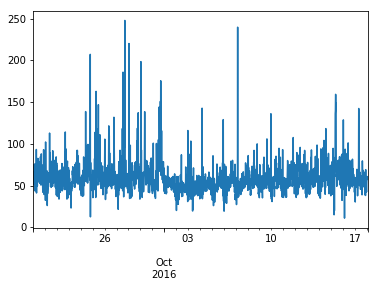

In [64]:
travel_time.plot()
plt.show()

In [63]:
sm.tsa.stattools.adfuller(travel_time)[:2]

(-8.7010140439136361, 3.8092858604890989e-14)

The p-value << 0.05, so we reject the null hypothesis that there is a unit root. No differencing is required.

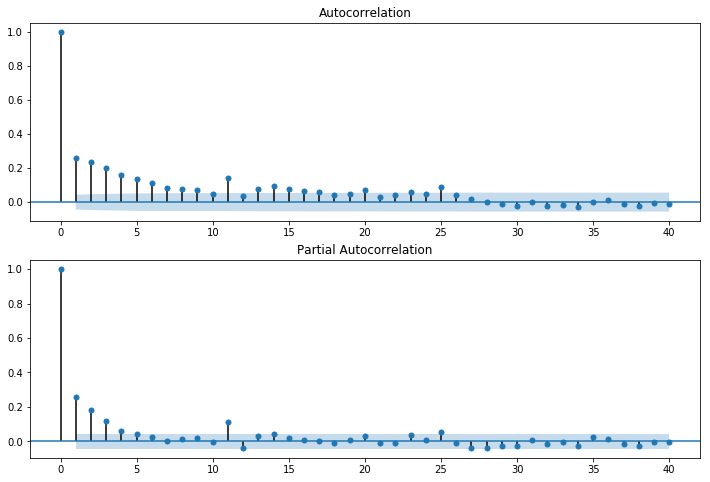

In [20]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(travel_time.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(travel_time, lags=40, ax=ax2)
fig

ACF plot shows this is a MA(l) model, where l>=1

PACF plot shows this is a AR(k) model, where k>=1

In [41]:
travel_ts=statsmodels.tsa.arima_model.ARIMA(travel_time, (1,0,1)).fit()

In [42]:
print travel_ts.params

const      58.745528
ar.L1.y     0.857334
ma.L1.y    -0.672177
dtype: float64


In [43]:
print travel_ts.summary()

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                 2025
Model:                     ARMA(1, 1)   Log Likelihood               -8689.768
Method:                       css-mle   S.D. of innovations             17.677
Date:                Tue, 02 May 2017   AIC                          17387.535
Time:                        20:38:34   BIC                          17409.989
Sample:                    09-20-2016   HQIC                         17395.775
                         - 10-18-2016                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         58.7455      0.901     65.210      0.000      56.980      60.511
ar.L1.y        0.8573      0.028     30.927      0.000       0.803       0.912
ma.L1.y       -0.6722      0.040    -16.620      0.0

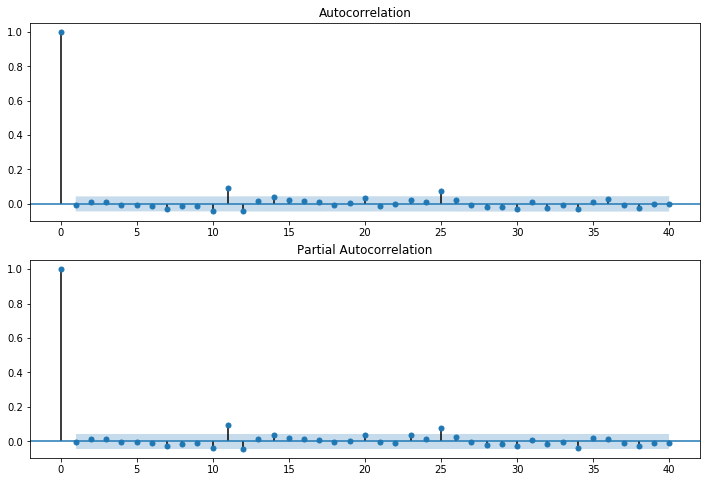

In [44]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(travel_ts.resid.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(travel_ts.resid, lags=40, ax=ax2)
fig

The ACF and PACF plots show the residual of the model is white noise, hence showing as a good predictive model.

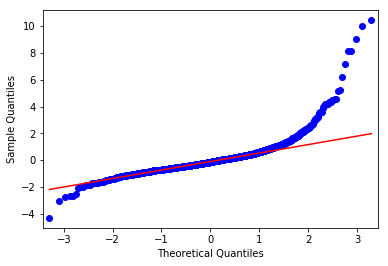

In [45]:
resid = travel_ts.resid
qqplot(resid,line='q',fit=True)

The points approximately lie in the line y=x, providing evidence of standard normal distribution. 

In [46]:
resid

2016-09-20 00:00:00     7.029472
2016-09-20 00:20:00    -3.890879
2016-09-20 00:40:00    -5.146335
2016-09-20 01:00:00     2.454864
2016-09-20 01:20:00    -7.961835
2016-09-20 01:40:00     1.493802
2016-09-20 02:00:00     1.574691
2016-09-20 02:20:00    17.384325
2016-09-20 02:40:00    -3.319210
2016-09-20 03:00:00   -16.429137
2016-09-20 03:20:00   -11.226091
2016-09-20 03:40:00    20.087431
2016-09-20 04:00:00   -15.993325
2016-09-20 04:20:00     4.446127
2016-09-20 04:40:00   -10.318348
2016-09-20 05:00:00     3.521886
2016-09-20 05:20:00    -6.985873
2016-09-20 05:40:00    -8.134139
2016-09-20 06:00:00     4.180013
2016-09-20 06:20:00    37.046546
2016-09-20 06:40:00   -22.284100
2016-09-20 07:00:00    12.552291
2016-09-20 07:20:00    -5.274366
2016-09-20 07:40:00    -3.320509
2016-09-20 08:00:00     0.817702
2016-09-20 08:20:00    -9.511335
2016-09-20 08:40:00    25.080528
2016-09-20 09:00:00     5.600409
2016-09-20 09:20:00    -2.589461
2016-09-20 09:40:00    20.836953
          

Akaike information criterion (AIC) is a measure of the relative quality of statistical models for a given set of data. The smaller AIC, the better the statistical model for prediction.

In [65]:
travel_ts.aic

17387.53546220903

Visualization of the performance

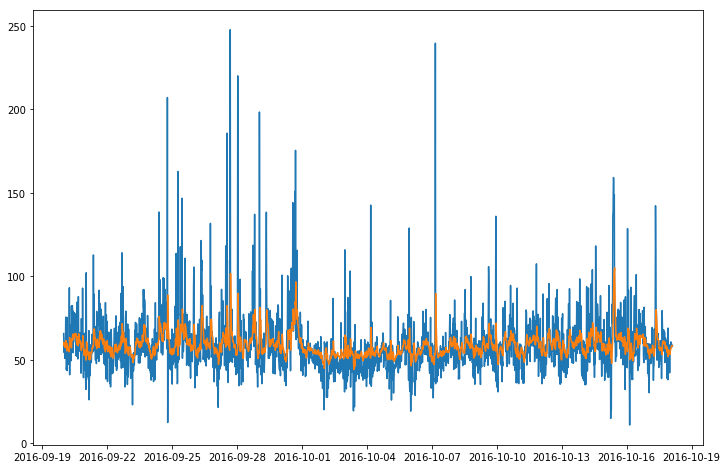

In [74]:
fig = plt.figure(figsize=(12, 8))
plt.plot(travel_time)
plt.plot(travel_ts.fittedvalues)
plt.show()

## median interpolation

In [77]:
df_travel_time_median = df_data.filter(regex='A2_routetime_median').median()
df_travel_time_median

dt0_A2_routetime_median      56.6700
dt20_A2_routetime_median     54.1800
dt40_A2_routetime_median     55.3950
dt60_A2_routetime_median     54.2550
dt80_A2_routetime_median     57.1700
dt100_A2_routetime_median    55.4100
dt120_A2_routetime_median    55.5225
dt140_A2_routetime_median    54.9300
dt160_A2_routetime_median    54.0850
dt180_A2_routetime_median    56.5700
dt200_A2_routetime_median    54.1800
dt220_A2_routetime_median    55.4600
dtype: float64

In [80]:
df_travel_time = df_data.filter(regex='A2_routetime_median').fillna(df_travel_time_median)

time_len = len(df_travel_time)*len(df_travel_time.iloc[0,0:9])
travel_time_index = [pd.to_datetime(df_data.iloc[0,0])]*time_len + \
np.arange(time_len)*timedelta(minutes=20)

travel_time = pd.Series(pd.DataFrame.as_matrix(df_travel_time.iloc[:,0:9]).reshape(-1))
travel_time.index = pd.Index(travel_time_index)

In [81]:
sm.tsa.stattools.adfuller(travel_time)[:2]

(-8.6084479125544817, 6.5745179920433426e-14)

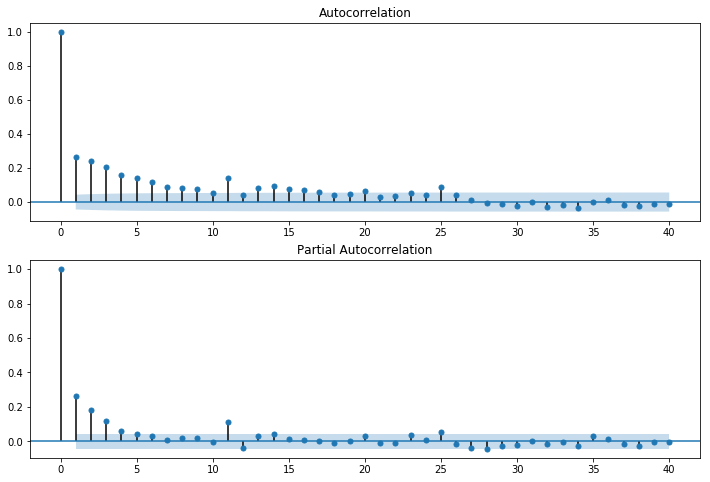

In [82]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(travel_time.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(travel_time, lags=40, ax=ax2)
fig

In [83]:
travel_ts=statsmodels.tsa.arima_model.ARIMA(travel_time, (1,0,1)).fit()

In [84]:
print travel_ts.summary()

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                 2025
Model:                     ARMA(1, 1)   Log Likelihood               -8687.422
Method:                       css-mle   S.D. of innovations             17.656
Date:                Tue, 02 May 2017   AIC                          17382.844
Time:                        21:08:41   BIC                          17405.298
Sample:                    09-20-2016   HQIC                         17391.084
                         - 10-18-2016                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         58.5239      0.916     63.866      0.000      56.728      60.320
ar.L1.y        0.8609      0.027     31.652      0.000       0.808       0.914
ma.L1.y       -0.6745      0.040    -16.804      0.0

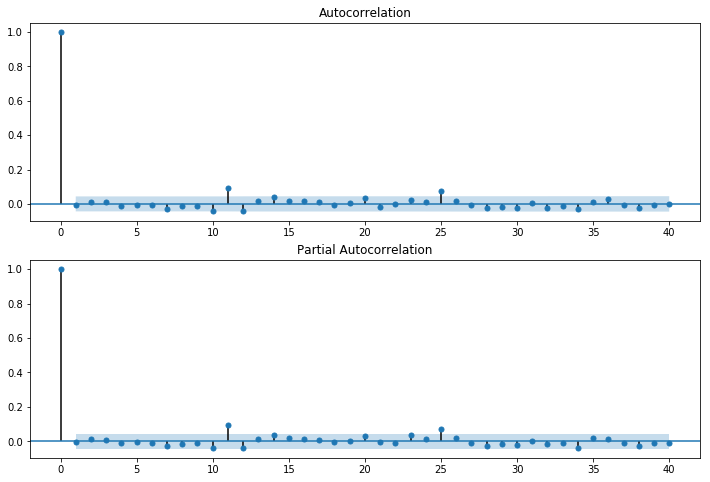

In [85]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(travel_ts.resid.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(travel_ts.resid, lags=40, ax=ax2)
fig

In [86]:
travel_ts.aic

17382.844457907904

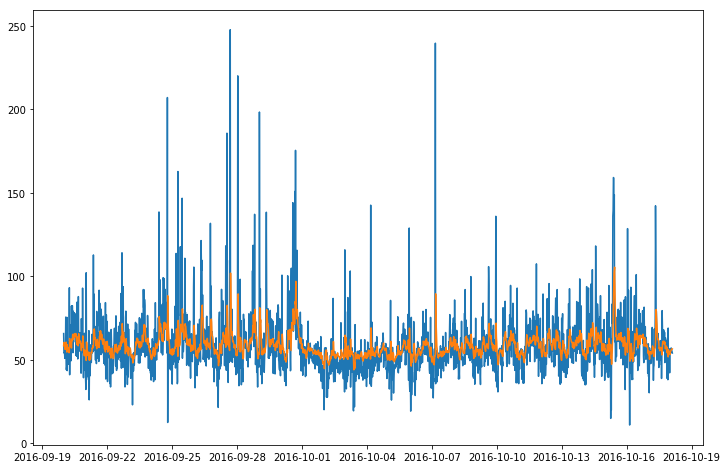

In [88]:
fig = plt.figure(figsize=(12, 8))
plt.plot(travel_time)
plt.plot(travel_ts.fittedvalues)
plt.show()